EDA after initial training of the model, for competition Spaceship Titanic

https://www.kaggle.com/competitions/spaceship-titanic/overview

EDA of feature importance of trained model,
first from loaded model, then permutations.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
is_kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', False)

In [ ]:
if is_kaggle:
  # Input data files are available in the read-only "../input/" directory
  # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

  for dirname, _, filenames in os.walk('/kaggle/input'):
      for filename in filenames:
          print(os.path.join(dirname, filename))

  # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
  # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
base_path =  '/kaggle/input/spaceship-titanic' if is_kaggle else '/content/'

In [ ]:
train_path = os.path.join(base_path, 'train.csv')
test_path = os.path.join(base_path, 'test.csv')
model_data_path = os.path.join(base_path, 'train_0001_spaceship_titanic_model_data.csv')

In [ ]:
df = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [ ]:
df_model_cols = pd.read_csv('train_0001_spaceship_titanic_baseline_rf_columns.csv')
df_model_cols

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,PassengerGroup,...,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e


In [ ]:
model_name = '/kaggle/input/train-0001-spaceship-titanic-baseline-rf/scikitlearn/spaceship_titanic_baseline_rf/1/train_0001_spaceship_titanic_baseline_rf.pkl' if is_kaggle else 'train_0001_spaceship_titanic_baseline_rf.pkl'

# Feature importance from trained Random Forest

In [ ]:
import joblib

loaded_rf_model = joblib.load(model_name)

In [ ]:
loaded_rf_model.feature_importances_

array([1.03005032e-01, 9.89299199e-02, 1.76120261e-03, 8.12048049e-02,
       7.76915592e-02, 6.38249699e-02, 9.58375628e-02, 8.34204858e-02,
       1.09432432e-01, 1.10926939e-01, 2.62757116e-02, 1.71892782e-03,
       4.39026878e-03, 5.53465382e-03, 2.66372509e-03, 1.09836742e-02,
       1.21747230e-02, 1.20220803e-02, 4.62399629e-05, 1.13995620e-02,
       1.20032059e-02, 2.34808751e-02, 1.52215904e-02, 9.68873425e-03,
       9.37256977e-03, 6.16031193e-03, 1.08282375e-02])

In [ ]:
len(df_model_cols.columns), len(loaded_rf_model.feature_importances_)

(27, 27)

In [ ]:
feature_importance_df = pd.DataFrame({
    "feature": df_model_cols.columns,
    "importance": loaded_rf_model.feature_importances_
}).sort_values("importance", ascending=False)
feature_importance_df

,feature,importance
9,PassengerGroup,0.110927
8,CabinNum,0.109432
0,CryoSleep,0.103005
1,Age,0.098930
6,Spa,0.095838
7,VRDeck,0.083420
3,RoomService,0.081205
4,FoodCourt,0.077692
5,ShoppingMall,0.063825
10,GroupMember,0.026276


Build in Gini Importance for Random Forest

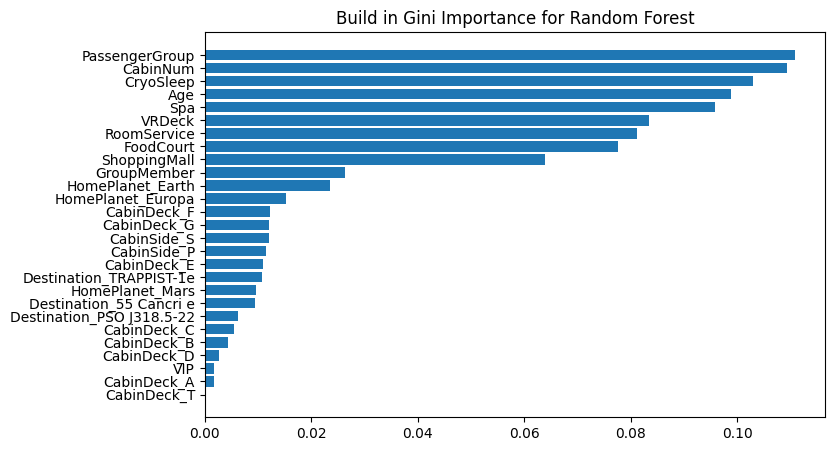

In [ ]:
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df["feature"], feature_importance_df["importance"])
plt.gca().invert_yaxis()
plt.title("Build in Gini Importance for Random Forest")
plt.show()

Based on feature importance following columns were ranked as more important:



- PassengerGroup
- CabinNum
- CryoSleep
- Age
- Luxury goods:
  RoomService, FoodCourt, ShoppingMall, Spa, VRDeck


Both PassengerGroup and CabinNum could be problematic, since Gini Coeffictient feature importance is prone to be biased toward features with many unique values.

PassengerGroup has 6217 and CabinNum has CabinNum unique values respectively.



We already saw that CryoSleep was important and this is one more reason to try combining Luxury goods.

Age should be further studied for features engineering.

# Permutation importance from trained random forest

In [ ]:
df_model = pd.read_csv(model_data_path)

In [ ]:
df_model.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'CabinNum', 'PassengerGroup', 'GroupMember',
       'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C', 'CabinDeck_D',
       'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G', 'CabinDeck_T',
       'CabinSide_P', 'CabinSide_S', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Transported'],
      dtype='object')

In [ ]:
X = df_model.drop('Transported', axis=1)
y = df_model['Transported']

In [ ]:
X.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'CabinNum', 'PassengerGroup', 'GroupMember',
       'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C', 'CabinDeck_D',
       'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G', 'CabinDeck_T',
       'CabinSide_P', 'CabinSide_S', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(loaded_rf_model, X, y, n_repeats=10, random_state=42)

 Permutation importance randomly shuffles the values inside certain column.

In [ ]:
perm_imp = pd.DataFrame({
    "feature": X.columns,
    "importance": result.importances_mean,
    "importance_std": result.importances_std,
}).sort_values("importance", ascending=False)

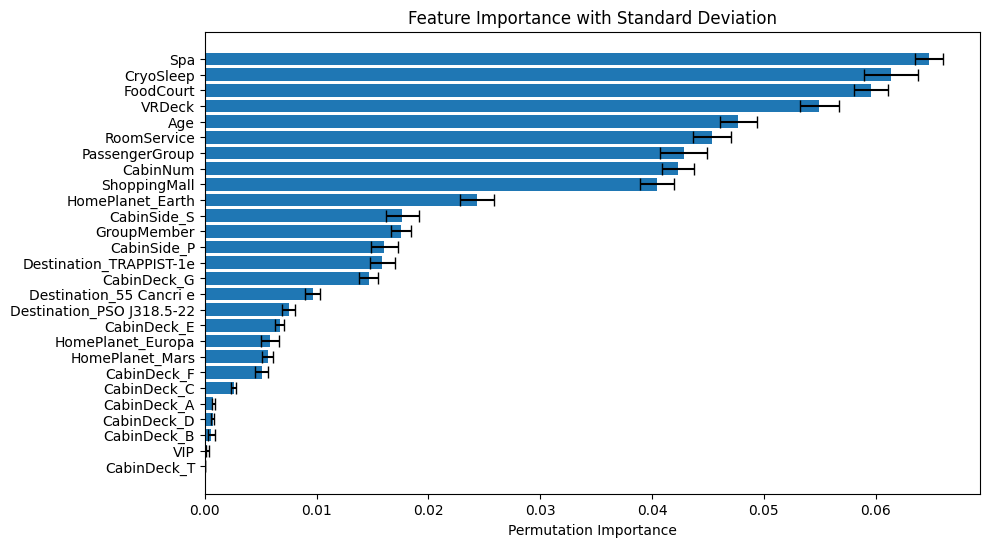

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(
    perm_imp["feature"],
    perm_imp["importance"],
    xerr=perm_imp["importance_std"],
    capsize=4
)
plt.gca().invert_yaxis()  # highest importance at top
plt.xlabel("Permutation Importance")
plt.title("Feature Importance with Standard Deviation")
plt.show()